# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV140"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR
590,SVM Neutrophils,140,0.732264,1.615458e-03,1.131345e-02
591,REACTOME_CYTOKINE_SIGNALING_IN_IMMUNE_SYSTEM,140,0.712535,2.407559e-08,6.038493e-07
592,REACTOME_INTERFERON_GAMMA_SIGNALING,140,0.861331,1.693174e-05,2.282610e-04


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP029990, SRP059039, SRP032775, SRP056443, SRP041826, SRP039361, SRP059172, SRP056840, SRP050000, SRP045500, SRP062966, SRP042161, SRP041620, SRP012015, SRP049820, SRP042228, SRP048801, SRP056098, SRP051688, SRP051848, SRP022133, SRP019758, SRP059695, SRP044593, SRP045569, SRP041538, SRP059057, SRP045352, SRP057196, SRP060370, SRP060416, 

In [18]:
lv_data.shape

(4591, 78)

In [19]:
lv_data.head()

pre- or post-challenge       tissue  age group organisms  \
project   run                                                                  
SRP029990 SRR988499                    Pre  whole blood  NaN   NaN       NaN   
          SRR988500                   Post  whole blood  NaN   NaN       NaN   
          SRR988501                    Pre  whole blood  NaN   NaN       NaN   
          SRR988502                   Post  whole blood  NaN   NaN       NaN   
          SRR988503                    Pre  whole blood  NaN   NaN       NaN   

                    severity flowcell lane infectious agent time point  ...  \
project   run                                                           ...   
SRP029990 SRR988499      NaN      NaN  NaN              NaN        NaN  ...   
          SRR988500      NaN      NaN  NaN              NaN        NaN  ...   
          SRR988501      NaN      NaN  NaN              NaN        NaN  ...   
          SRR988502      NaN      NaN  NaN              NaN        NaN  ...   
          SRR988503      NaN      NaN  NaN              NaN        NaN  ...   

                    subject # ad type disease state cell stimulation  \
project   run                                                          
SRP029990 SRR988499       NaN     NaN           NaN              NaN   
          SRR988500       NaN     NaN           NaN              NaN   
          SRR988501       NaN     NaN           NaN              NaN   
          SRR988502       NaN     NaN           NaN              NaN   
          SRR988503       NaN     NaN           NaN              NaN   

                    phenotype c1 chip id experiment_sample_name tonsil donor  \
project   run                                                                  
SRP029990 SRR988499       NaN        NaN                    NaN          NaN   
          SRR988500       NaN        NaN                    NaN          NaN   
          SRR988501       NaN        NaN                    NaN          NaN   
          SRR988502       NaN        NaN                    NaN          NaN   
          SRR988503       NaN        NaN                    NaN          NaN   

                    facs gating     LV140  
project   run                              
SRP029990 SRR988499         NaN  0.064879  
          SRR988500         NaN  1.596225  
          SRR988501         NaN  0.125392  
          SRR988502         NaN  1.347595  
          SRR988503         NaN  0.110362  

[5 rows x 78 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

pre- or post-challenge                  0.351302
timepoint                               0.160385
organisms                               0.143177
severity                                0.143177
flowcell                                0.143177
lane                                    0.143177
agent                                   0.140656
donor                                   0.135972
treatment                               0.135594
location                                0.134830
individual                              0.134830
group                                   0.110298
age                                     0.094690
infectious agent                        0.086694
time point                              0.075799
time                                    0.065501
country                                 0.055007
history of brucellosis                  0.055007
subgroup                                0.055007
response to treatment of brucellosis    0.055007
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

tissue       0.053967
cell type    0.016507
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "tissue",
        "cell type",
        # "tissue subtype",
        # "tissue type",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[0]

tissue                      cell type     LV140
project   run                                                             
SRP029990 SRR988500   whole blood                            NaN  1.596225
SRP059039 SRR2049676  Whole blood                            NaN  1.579666
          SRR2049702  Whole blood                            NaN  1.557704
          SRR2049669  Whole blood                            NaN  1.539822
SRP032775 SRR1026967          NaN                            NaN  1.517080
          SRR1026966          NaN                            NaN  1.514737
SRP059039 SRR2049787  Whole blood                            NaN  1.505980
          SRR2049715  Whole blood                            NaN  1.499738
          SRR2049679  Whole blood                            NaN  1.454323
          SRR2049761  Whole blood                            NaN  1.449992
          SRR2049751  Whole blood                            NaN  1.417882
SRP056443 SRR1925785          NaN                           PBMC  1.388116
          SRR1925795          NaN                           PBMC  1.386479
SRP041826 SRR1282191          NaN  Primary CD14+/CD16+ monocytes  1.353137
SRP029990 SRR988502   whole blood                            NaN  1.347595
SRP059039 SRR2049782  Whole blood                            NaN  1.347455
          SRR2049738  Whole blood                            NaN  1.345548
          SRR2049735  Whole blood                            NaN  1.316980
SRP041826 SRR1282194          NaN  Primary CD14+/CD16+ monocytes  1.259015
          SRR1282190          NaN  Primary CD14+/CD16+ monocytes  1.258918
SRP059039 SRR2049659  Whole blood                            NaN  1.254569
          SRR2049636  Whole blood                            NaN  1.245622
          SRR2049621  Whole blood                            NaN  1.237212
          SRR2049748  Whole blood                            NaN  1.229853
          SRR2049763  Whole blood                            NaN  1.227815

In [25]:
# what is there in these projects?
lv_data.loc[["SRP032775"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

tissue            infectious agent      time point  \
project   run                                                                   
SRP032775 SRR1026967          NaN  Plasmodium falciparum (Pf)             NaN   
          SRR1026966          NaN  Plasmodium falciparum (Pf)             NaN   
          SRR1177742  whole blood  Plasmodium falciparum (Pf)  post-infection   
          SRR1177748  whole blood  Plasmodium falciparum (Pf)  post-infection   
          SRR1026989          NaN  Plasmodium falciparum (Pf)             NaN   
          SRR1026894          NaN  Plasmodium falciparum (Pf)             NaN   
          SRR1026893          NaN  Plasmodium falciparum (Pf)             NaN   
          SRR1026941          NaN  Plasmodium falciparum (Pf)             NaN   
          SRR1027005          NaN  Plasmodium falciparum (Pf)             NaN   
          SRR1026877          NaN  Plasmodium falciparum (Pf)             NaN   

                          time-point     LV140  
project   run                                   
SRP032775 SRR1026967  Post-infection  1.517080  
          SRR1026966  Post-infection  1.514737  
          SRR1177742             NaN  1.227025  
          SRR1177748             NaN  0.999969  
          SRR1026989  Post-infection  0.957639  
          SRR1026894  Post-infection  0.924277  
          SRR1026893  Post-infection  0.922022  
          SRR1026941  Post-infection  0.876036  
          SRR1027005  Post-infection  0.874520  
          SRR1026877  Post-infection  0.871104

In [26]:
SELECTED_ATTRIBUTE = "tissue"

In [27]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["cell type"]

## Get plot data

In [28]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [29]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [30]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [31]:
plot_data.head(20)

tissue     LV140
project   run                                                
SRP029990 SRR988500                     whole blood  1.596225
SRP059039 SRR2049676                    Whole blood  1.579666
          SRR2049702                    Whole blood  1.557704
          SRR2049669                    Whole blood  1.539822
SRP032775 SRR1026967                NOT CATEGORIZED  1.517080
          SRR1026966                NOT CATEGORIZED  1.514737
SRP059039 SRR2049787                    Whole blood  1.505980
          SRR2049715                    Whole blood  1.499738
          SRR2049679                    Whole blood  1.454323
          SRR2049761                    Whole blood  1.449992
          SRR2049751                    Whole blood  1.417882
SRP056443 SRR1925785                           PBMC  1.388116
          SRR1925795                           PBMC  1.386479
SRP041826 SRR1282191  Primary CD14+/CD16+ monocytes  1.353137
SRP029990 SRR988502                     whole blood  1.347595
SRP059039 SRR2049782                    Whole blood  1.347455
          SRR2049738                    Whole blood  1.345548
          SRR2049735                    Whole blood  1.316980
SRP041826 SRR1282194  Primary CD14+/CD16+ monocytes  1.259015
          SRR1282190  Primary CD14+/CD16+ monocytes  1.258918

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [32]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [33]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [34]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [35]:
_srp_code = "SRP059172"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'group']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [36]:
_srp_code = "SRP062966"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'disease status']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [37]:
# _srp_code = "SRP064464"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"Pancreatic islets"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [38]:
# _srp_code = "SRP029990" # about Malaria
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'pre- or post-challenge']}, Malaria)",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

_srp_code = "SRP029990" # these cases seem to be the same in SRP032775 and are just a few
final_plot_data = final_plot_data.drop((_srp_code,))

In [39]:
_srp_code = "SRP032775" # this one is also about Maralia

main_attr = "time point"
second_attrs = ["time-point"]

def _apply_func(x):
    return "Whole blood" + f" ({x[main_attr].lower()}, Malaria)"

_lv_data = lv_data.loc[(_srp_code,), [main_attr] + second_attrs + [LV_NAME]]
_new_column = _lv_data[[main_attr] + second_attrs].fillna(
    method="backfill", axis=1
)[main_attr]
_lv_data[main_attr] = _new_column
# _lv_data = _lv_data.drop(columns=second_attrs)

_tmp = _lv_data.apply(
    _apply_func,
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

/tmp/ipykernel_560/1597515848.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  _lv_data = lv_data.loc[(_srp_code,), [main_attr] + second_attrs + [LV_NAME]]


In [40]:
_srp_code = "SRP059039"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'group']} cases)",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [41]:
_srp_code = "SRP056443"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'time']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [42]:
_srp_code = "SRP056840"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: "Whole blood"
    + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [43]:
_srp_code = "SRP050000"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: "Peripheral blood (SIRS or sepsis)",
    # + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [44]:
_srp_code = "SRP045500"
_tmp = lv_data.loc[(_srp_code,)].apply(
    lambda x: x["celltype"],
    # + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

/tmp/ipykernel_560/3920196671.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  _tmp = lv_data.loc[(_srp_code,)].apply(


In [45]:
# _srp_code = "SRP058773"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"Fibroblasts",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [46]:
# _srp_code = "SRP027015"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (MM.1S)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [47]:
# _srp_code = "SRP061329"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [48]:
# _srp_code = "SRP018838"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [49]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [50]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [51]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [52]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [53]:
len(attr_order)

15

In [54]:
attr_order[:5]

['Whole blood (Diarrhea cases)',
 'Whole blood (post-infection, Malaria)',
 'PBMC (DX)',
 'Primary CD14+/CD16+ monocytes',
 'M1-polarized IPSDM']

## Plot

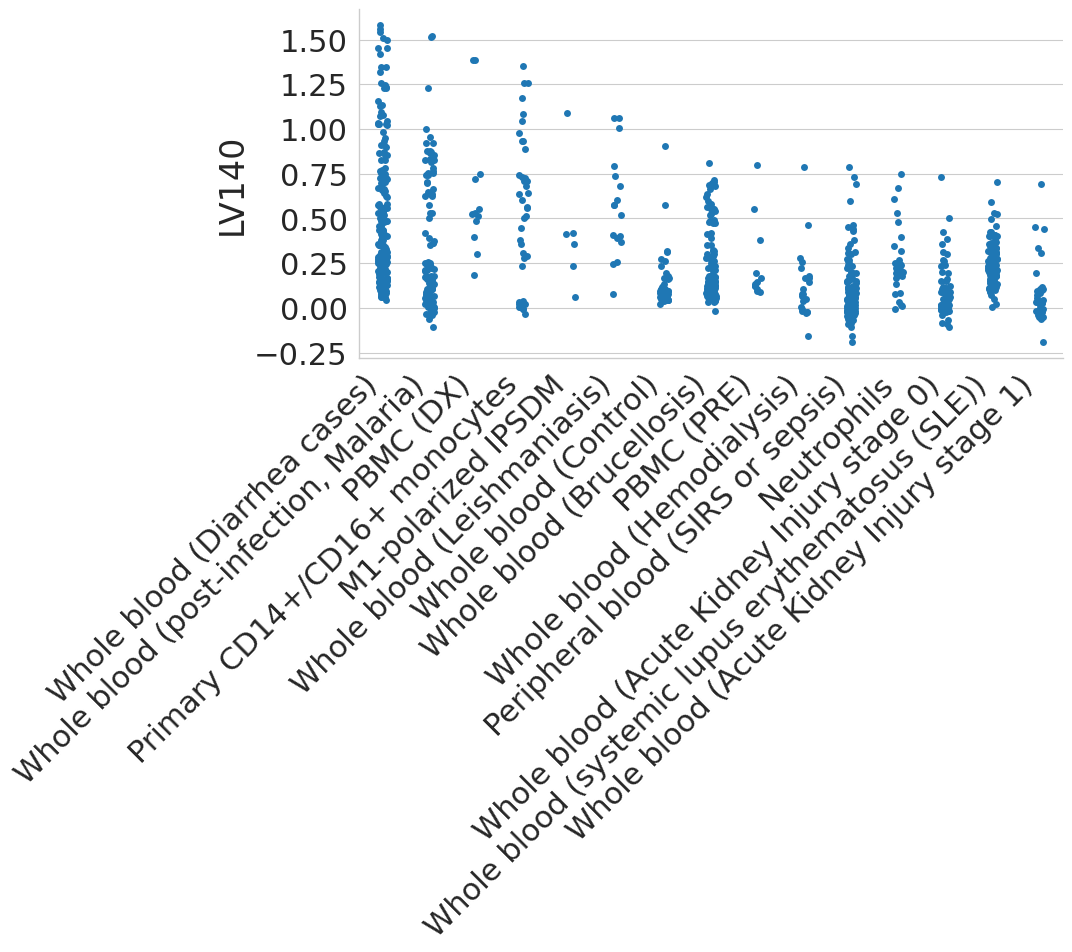

In [55]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [56]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [ ]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("^NOT CATEGORIZED$")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

In [ ]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP045500"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

In [ ]:
_tmp["sirs outcomes"].value_counts()

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )